# Homework 1
Train a word2vec model using gensim. [This article](https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.YIc63H1KjUI) can provide a straightforward way for building a model simply with gensim.

After the model is built, take 20 words are random and plot them using ```tsnescatterplot()```. You can reuse the code we went through in class.

In [1]:
!wget https://storage.googleapis.com/nicksdemobucket/shakespeare.txt

--2022-05-03 18:30:47--  https://storage.googleapis.com/nicksdemobucket/shakespeare.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.143.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘shakespeare.txt’

shakespeare.txt     100%[===================>]   1.06M  --.-KB/s    in 0.01s   

2022-05-03 18:30:48 (94.5 MB/s) - ‘shakespeare.txt’ saved [1115394/1115394]



In [2]:
with open('shakespeare.txt', 'r') as file:
    shakespeare_text = file.read().replace('\n', ' ')

In [17]:
print(shakespeare_text[:150])

First Citizen: Before we proceed any further, hear me speak.  All: Speak, speak.  First Citizen: You are all resolved rather to die than to famish?  A


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing
from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

2022-05-03 18:53:50,945 : INFO : NumExpr defaulting to 2 threads.


# DATASET

In [19]:
import nltk
nltk.download("punkt")
from nltk import tokenize
word_list = tokenize.sent_tokenize(shakespeare_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
len(word_list)

12460

In [31]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

final = []
for i in range(len(word_list)):
  temp = tokenizer.tokenize(word_list[i])
  filtered = [w for w in temp if not w.lower() in stop_words]
  final.append(filtered)

In [33]:
# build vocabulary and train model
model = gensim.models.Word2Vec(
        final,
        size=150,
        window=10,
        min_count=2,
        workers=10,
        iter=10)

2022-05-03 19:49:11,155 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2022-05-03 19:49:11,158 : INFO : collecting all words and their counts
2022-05-03 19:49:11,159 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-05-03 19:49:11,185 : INFO : PROGRESS: at sentence #10000, processed 88761 words, keeping 11720 word types
2022-05-03 19:49:11,192 : INFO : collected 13068 word types from a corpus of 107249 raw words and 12460 sentences
2022-05-03 19:49:11,193 : INFO : Loading a fresh vocabulary
2022-05-03 19:49:11,210 : INFO : effective_min_count=2 retains 7032 unique words (53% of original 13068, drops 6036)
2022-05-03 19:49:11,211 : INFO : effective_min_count=2 leaves 101213 word corpus (94% of original 107249, drops 6036)
2022-05-03 19:49:11,235 : INFO : deleting the raw counts dictionary of 13068 items
2022-05-03 19:49:11,236 : INFO : sample=0.001 downsamples 36 most-common words
2022-05-03 19:49:11,238 : INFO : downsamp

In [38]:
w1 = "man"
model.wv.most_similar(positive=w1)

[('think', 0.9977723956108093),
 ('wipe', 0.9973871111869812),
 ('ne', 0.9971585869789124),
 ('see', 0.9970113039016724),
 ('rich', 0.9969277381896973),
 ('haunt', 0.9968494772911072),
 ('word', 0.9966139197349548),
 ('world', 0.996541440486908),
 ('drunk', 0.9964993596076965),
 ('bed', 0.9964473247528076)]

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [46]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 150), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [58]:
random = ["music","death","dog","man","light","drink",
          "lead","knowledge","horror","demand","clock",
          "sleep","heart","bubble","glass","function",
          "price","knife","table","book","war"]


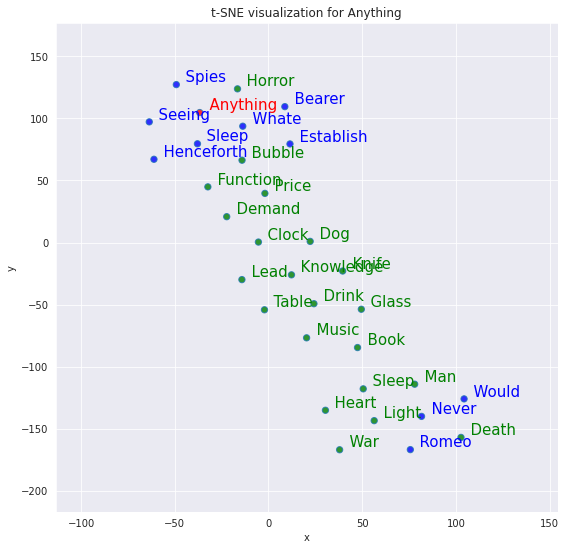

In [59]:
tsnescatterplot(model, 'anything',random)